In [1]:
#### Necessary libraries ####
import numpy as np              # Numpy is the fundamental package for scientific computing in Python.
import matplotlib.pyplot as plt # Matplotlib is a scientific plotting package.
from combine_data import read_data

# The statement below enforces the plots to be put into this notebook, instead of in their own windows.
%matplotlib inline

In [2]:
basedir = './'

casenames = ['Australia', 'Pakistan', 'Scotland']
exclude = ['WRF-WVT']

In [3]:
names = {}
corr_matrix = {}
for casename in casenames:
    all_maps = read_data(basedir, casename)

    sel_maps = all_maps.drop_vars(exclude)
    names[casename] = sel_maps.keys()

    corr_matrix[casename] = np.zeros((len(names[casename]), len(names[casename])))

    for i, (name1, dataset1) in enumerate(sel_maps.data_vars.items()):
        print(name1)
        for j, (name2, dataset2) in enumerate(sel_maps.data_vars.items()):
            if i >= j:
                nanind = ~np.isnan(dataset1.values) & ~np.isnan(dataset2.values)
                corr_matrix[casename][i,j] = np.corrcoef(dataset1.values[nanind], dataset2.values[nanind])[1,0]
            else:
                corr_matrix[casename][i,j] = np.nan

Loading wam2layers data for Australia
Loading 2ldrm data for Australia
Loading utrack data for Australia
Loading btrims data for Australia
Loading tracmass data for Australia
Loading ughent data for Australia
Loading UIB data for Australia
Loading UniVie data for Australia
Loading CHc data for Australia
Loading xu data for Australia
Loading tatfancheng data for Australia
Loading uvigo data for Australia
Loading WRF-WVT data for Australia
WAM2layers
2LDRM
UTrack Ens1
UTrack Ens2
UTrack Ens3
UTrack Ens4
UTrack Ens5
B-TrIMS
TRACMASS
FLEXPART-HAMSTER Ens1
FLEXPART-HAMSTER Ens2
FLEXPART-HAMSTER Ens3
FLEXPART-HAMSTER Ens4
FLEXPART-HAMSTER Ens5
FLEXPART-WaterSip (UiB)
FLEXPART-WaterSip (UniVie)
LAGRANTO-WaterSip (CHc)
FLEXPART-WaterSip (Xu)
FLEXPART-WaterSip (TFC) Ens1
FLEXPART-WaterSip (TFC) Ens2
FLEXPART-WaterSip (TFC) Ens3
FLEXPART-LATTIN (UVigo)
FLEXPART-Stohl (UVigo)
Loading wam2layers data for Pakistan
Loading 2ldrm data for Pakistan
Loading utrack data for Pakistan
Loading btrims data 

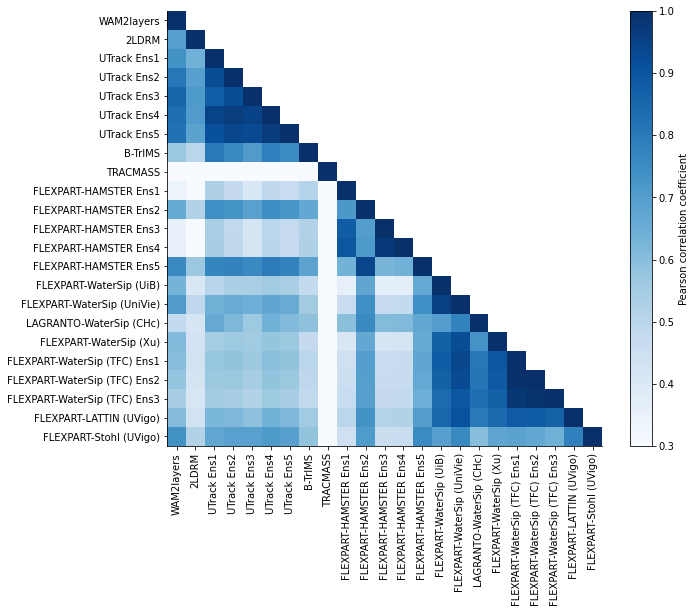

In [5]:
for casename in casenames:
    plt.close()
    fig = plt.figure(figsize=(10,8))
    fig.patch.set_facecolor('white')
    ax = fig.add_subplot(111)
    plt.imshow(corr_matrix[casename], vmin=0.3, vmax=1, cmap='Blues')
    plt.xticks(np.arange(len(names[casename])))
    plt.yticks(np.arange(len(names[casename])))
    ax.set_xticklabels(names[casename], rotation=90)
    ax.set_yticklabels(names[casename])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.colorbar(label='Pearson correlation coefficient')
    plt.savefig(f'./CorrelationMatrix_{casename}.png', bbox_inches='tight', dpi=300)